<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Heteroskedasticity_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import pandas as pd

In [78]:
df = pd.read_csv("http://ishelp.info/data/insurance.csv")

In [79]:
smokers = df[df["smoker"] == "yes"]
nonsmokers = df[df["smoker"] == "no"]

<Axes: xlabel='charges', ylabel='Count'>

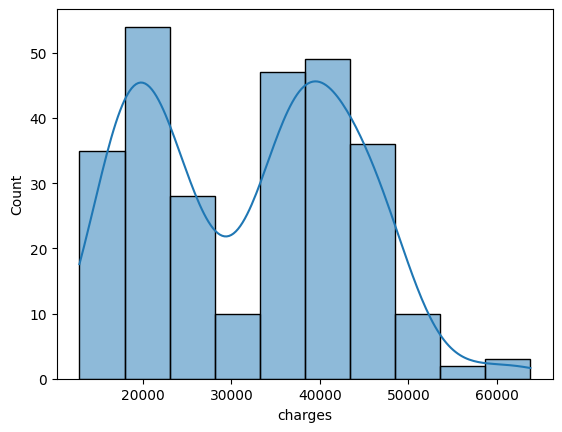

In [80]:
sns.histplot(data=smokers, x="charges", kde=True)

<Axes: xlabel='charges', ylabel='Count'>

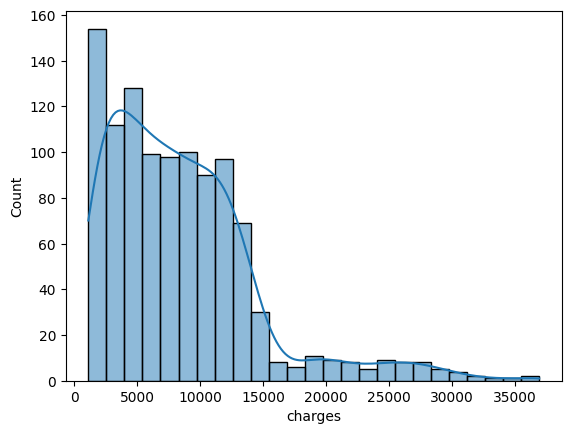

In [81]:
sns.histplot(data=nonsmokers, x="charges", kde=True)

In [82]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


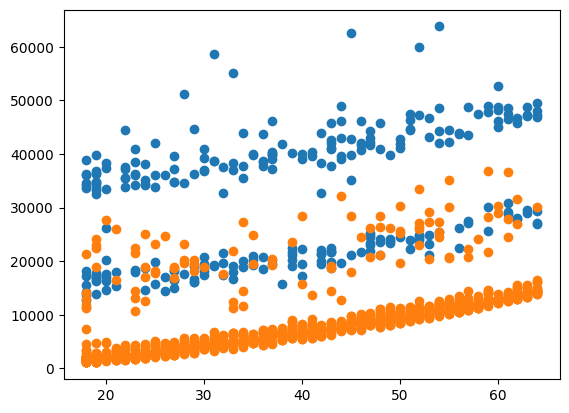

In [83]:
plt.scatter(smokers.age, smokers.charges)
plt.scatter(nonsmokers.age, nonsmokers.charges)
plt.show()

In [84]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.age, df.charges)

In [85]:
#y = mx plus b

y = slope * df.age + intercept

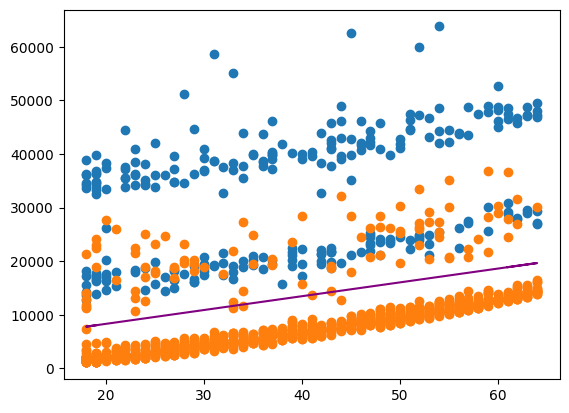

In [86]:
plt.scatter(smokers.age, smokers.charges)
plt.scatter(nonsmokers.age, nonsmokers.charges)
plt.plot(df.age, y, color="purple")
plt.show()

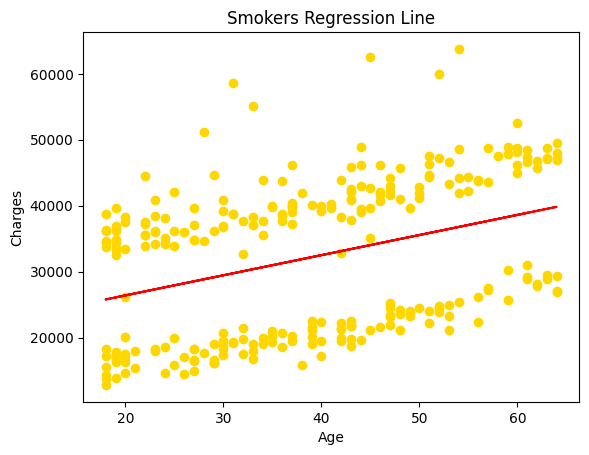

In [87]:
#regression line plot for smokers
slope, intercept, r_value, p_value, std_err = stats.linregress(smokers.age, smokers.charges)

y = slope * smokers.age + intercept

plt.scatter(smokers.age, smokers.charges, color="gold")
plt.plot(smokers.age, y, color="red")
plt.title("Smokers Regression Line")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

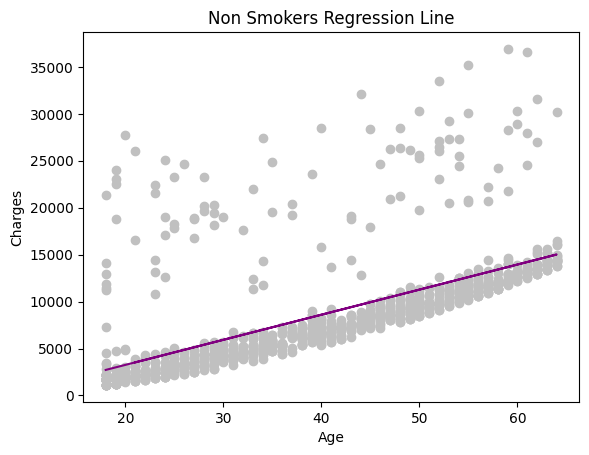

In [88]:
#regression line plot for non smokers
slope, intercept, r_value, p_value, std_err = stats.linregress(nonsmokers.age, nonsmokers.charges)

y = slope * nonsmokers.age + intercept

plt.scatter(nonsmokers.age, nonsmokers.charges, color='silver')
plt.plot(nonsmokers.age, y, color="purple")
plt.title("Non Smokers Regression Line")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [89]:
!pip install statsmodels

In [90]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

In [91]:
model = ols(formula="age~charges", data=df).fit()

In [92]:
mse = model.ssr / model.df_resid
mse

np.float64(179.8870833985103)

In [93]:
#mean squared errors for smokers
model = ols(formula="age~charges", data=smokers).fit()

mse = model.ssr / model.df_resid
mse

np.float64(168.1864997011369)

In [94]:
#mean squared errors for non smokers
model = ols(formula="age~charges", data=nonsmokers).fit()

mse = model.ssr / model.df_resid
mse

np.float64(120.24572953603403)

In [120]:
other_details_non_smokers = df[(df['smoker'] == 'no') & (df['age'] <= 20) & (df['charges'] > 50000)]

age_bias = df[(df['age'] < 20) & (df['charges'] > 5000)]

In [121]:
age_bias.sample(20)

,age,sex,bmi,children,smoker,region,charges
1039,19,male,27.265,2,no,northwest,22493.65964
503,19,male,30.250,0,yes,southeast,32548.34050
296,19,male,27.700,0,yes,southwest,16297.84600
1196,19,female,30.020,0,yes,northwest,33307.55080
1282,18,female,21.660,0,yes,northeast,14283.45940
525,18,female,33.880,0,no,southeast,11482.63485
618,19,female,33.110,0,yes,southeast,34439.85590
263,19,male,36.955,0,yes,northwest,36219.40545
362,19,female,21.700,0,yes,southwest,13844.50600
526,19,female,30.590,2,no,northwest,24059.68019


In [122]:
from collections import Counter


counter = Counter(round(age_bias.bmi, 0))

In [123]:
counter

Counter({28.0: 6,
         32.0: 4,
         30.0: 3,
         25.0: 1,
         37.0: 2,
         35.0: 3,
         29.0: 3,
         17.0: 1,
         38.0: 2,
         22.0: 4,
         33.0: 2,
         34.0: 2,
         31.0: 1,
         42.0: 1,
         26.0: 1,
         27.0: 3,
         45.0: 1,
         39.0: 1})